In [92]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

In [131]:
# Simulation Parameters
init_pop = 1000
time = 300
trials = 1000

# Parameters for Base Model
beta = 0.202
beta_f = 0.258
mu = 0.04
gamma = 0.067
sigma = 0.045
alpha = 0.05

# Parameters for SHERIF Model
lamb = 0.17
lamb_f = 0.27
tau = 0.01
omega = 0.05
kappa = 0.21
delta = 0.13

# Parameters for SVIFR Model
epsilon = 0.22
phi = 0.13
phi_f = 0.23

In [46]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, beta, beta_f):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + beta + beta_f):
            pop_update[0] -= 1
            pop_update[1] += 1
    return pop_update

def s_update_noFuneral(s, mu, beta):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + beta):
            pop_update[0] -= 1
            pop_update[1] += 1
    return pop_update

def i_update(i, mu, gamma):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[1] -= 1
        elif seed < (mu + gamma):
            pop_update[1] -= 1
            pop_update[3] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
    return pop_update

def f_update(f, mu, sigma):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
        elif seed < (mu + sigma):
            pop_update[3] -= 1
            pop_update[2] += 1
    return pop_update

In [47]:
def base_model(init_pop, time, beta, beta_f, mu, gamma, sigma):
    pop = np.zeros([4, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        i = pop[1, t-1]
        r = pop[2, t-1]
        f = pop[3, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, beta, beta_f)
        i_change = i_update(i, mu, gamma)
        r_change = r_update(r, mu)
        f_change = f_update(f, mu, sigma)
        
        pop_change = n_change + s_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'i': pop[1,:],
        'r': pop[2,:],
        'f': pop[3,:],
    })
    return df

In [48]:
def base_model_noFuneral(init_pop, time, beta, mu, gamma, sigma):
    pop = np.zeros([4, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        i = pop[1, t-1]
        r = pop[2, t-1]
        f = pop[3, t-1]

        n_change = n_update(n, mu)
        s_change = s_update_noFuneral(s, mu, beta)
        i_change = i_update(i, mu, gamma)
        r_change = r_update(r, mu)
        f_change = f_update(f, mu, sigma)
        
        pop_change = n_change + s_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'i': pop[1,:],
        'r': pop[2,:],
        'f': pop[3,:],
    })
    return df

In [66]:
base = base_model(1000, 300, beta, beta_f, mu, gamma, sigma)
base_noFuneral = base_model_noFuneral(1000, 300, beta, mu, gamma, sigma)
display(base)
display(base_noFuneral)

,time,s,i,r,f
0,0,1000.0,0.0,0.0,0.0
1,1,523.0,469.0,0.0,0.0
2,2,300.0,656.0,0.0,26.0
3,3,178.0,739.0,1.0,64.0
4,4,128.0,765.0,5.0,99.0
...,...,...,...,...,...
296,296,71.0,304.0,252.0,202.0
297,297,80.0,295.0,259.0,209.0
298,298,67.0,297.0,261.0,209.0
299,299,56.0,295.0,256.0,219.0


,time,s,i,r,f
0,0,1000.0,0.0,0.0,0.0
1,1,792.0,211.0,0.0,0.0
2,2,651.0,337.0,0.0,16.0
3,3,519.0,423.0,4.0,41.0
4,4,423.0,477.0,7.0,74.0
...,...,...,...,...,...
296,296,172.0,366.0,324.0,301.0
297,297,178.0,359.0,326.0,292.0
298,298,178.0,349.0,327.0,291.0
299,299,187.0,340.0,324.0,300.0


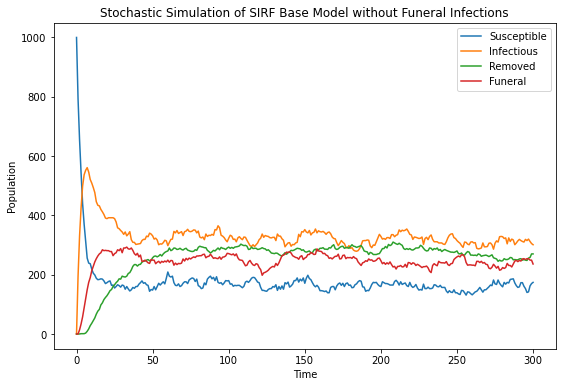

In [50]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=base_noFuneral, x="time", y="s", label="Susceptible")
sns.lineplot(data=base_noFuneral, x="time", y="i", label="Infectious")
sns.lineplot(data=base_noFuneral, x="time", y="r", label="Removed")
sns.lineplot(data=base_noFuneral, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SIRF Base Model without Funeral Infections')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");

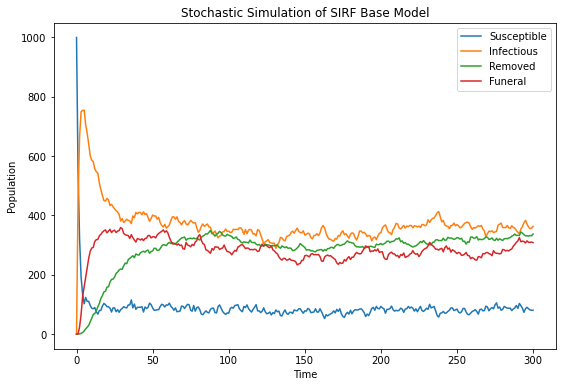

In [51]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=base, x="time", y="s", label="Susceptible")
sns.lineplot(data=base, x="time", y="i", label="Infectious")
sns.lineplot(data=base, x="time", y="r", label="Removed")
sns.lineplot(data=base, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SIRF Base Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");

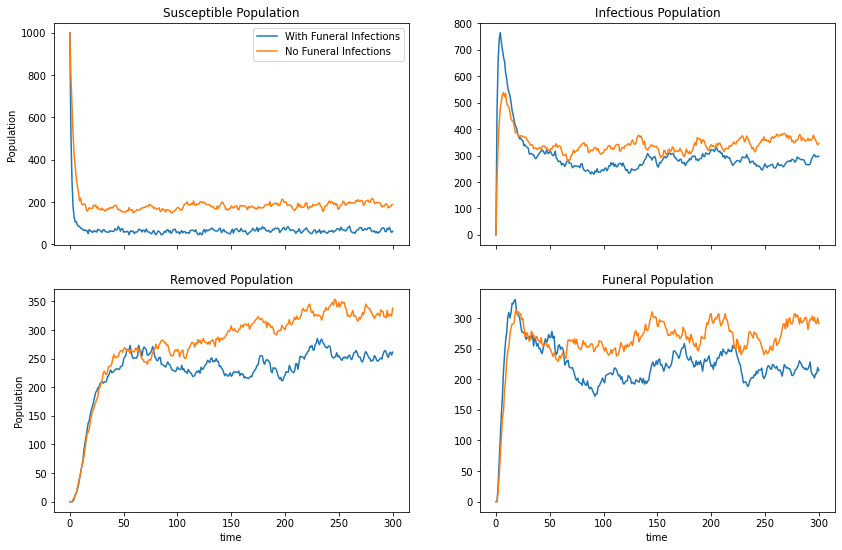

In [106]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,9))
sns.lineplot(ax=ax[0,0], data=base, x="time", y="s", label="With Funeral Infections")
sns.lineplot(ax=ax[0,0], data=base_noFuneral, x="time", y="s", label="No Funeral Infections")
ax[0,0].set_title("Susceptible Population")
ax[0,0].legend(loc="upper right")
ax[0,0].set_ylabel("Population")

sns.lineplot(ax=ax[0,1], data=base, x="time", y="i")
sns.lineplot(ax=ax[0,1], data=base_noFuneral, x="time", y="i")
ax[0,1].set_title("Infectious Population")
ax[0,1].set_ylabel("")

sns.lineplot(ax=ax[1,0], data=base, x="time", y="r")
sns.lineplot(ax=ax[1,0], data=base_noFuneral, x="time", y="r")
ax[1,0].set_title("Removed Population")
ax[1,0].set_ylabel("Population")

sns.lineplot(ax=ax[1,1], data=base, x="time", y="f")
sns.lineplot(ax=ax[1,1], data=base_noFuneral, x="time", y="f")
ax[1,1].set_title("Funeral Population")
ax[1,1].set_ylabel("")
fig.tight_layout()

In [90]:
def pop_density(init_pop, time, trials):
    
    s_pop = np.zeros(trials)
    i_pop = np.zeros(trials)
    r_pop = np.zeros(trials)
    f_pop = np.zeros(trials)
    
    s_pop2 = np.zeros(trials)
    i_pop2 = np.zeros(trials)
    r_pop2 = np.zeros(trials)
    f_pop2 = np.zeros(trials)

    for j in tqdm(range(trials)):
        df = base_model(init_pop, time, beta, beta_f, mu, gamma, sigma)
        s_pop[j] = df["s"][time]
        i_pop[j] = df["i"][time]
        r_pop[j] = df["r"][time]
        f_pop[j] = df["f"][time]
        
        df2 = base_model_noFuneral(init_pop, time, beta, mu, gamma, sigma)
        s_pop2[j] = df2["s"][time]
        i_pop2[j] = df2["i"][time]
        r_pop2[j] = df2["r"][time]
        f_pop2[j] = df2["f"][time]
        
    endPop_df1 = pd.DataFrame({
        'funeral': "With funeral infections",
        's': s_pop,
        'i': i_pop,
        'r': r_pop,
        'f': f_pop,
    })
    
    endPop_df2 = pd.DataFrame({
        'funeral': "No Funeral Infections",
        's': s_pop2,
        'i': i_pop2,
        'r': r_pop2,
        'f': f_pop2,
    })
    
    endPop_df = pd.concat([endPop_df1, endPop_df2])
        
    return endPop_df

In [93]:
pop_df = pop_density(1000, 300, 1000)
display(pop_df)

  0%|          | 0/1000 [00:00<?, ?it/s]

,funeral,s,i,r,f
0,With funeral infections,102.0,346.0,338.0,302.0
1,With funeral infections,70.0,282.0,290.0,197.0
2,With funeral infections,72.0,398.0,331.0,310.0
3,With funeral infections,79.0,359.0,325.0,262.0
4,With funeral infections,63.0,331.0,242.0,251.0
...,...,...,...,...,...
995,No Funeral Infections,128.0,255.0,205.0,180.0
996,No Funeral Infections,137.0,252.0,240.0,224.0
997,No Funeral Infections,186.0,375.0,315.0,285.0
998,No Funeral Infections,140.0,292.0,250.0,228.0


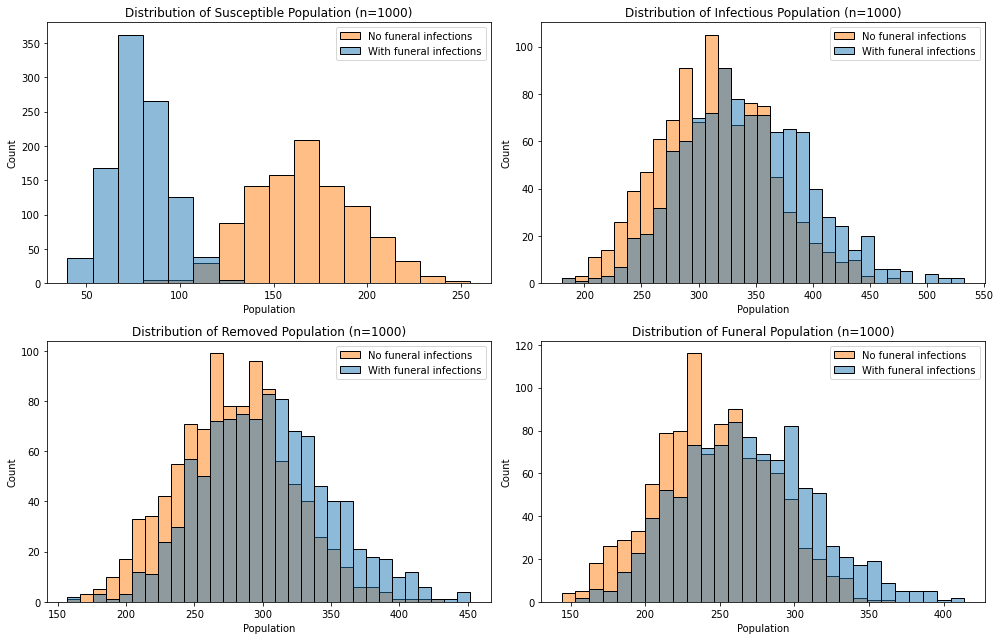

In [138]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

sns.histplot(ax=ax[0,0], data=pop_df, x="s", hue="funeral", fill=True)
ax[0,0].legend(loc="upper right", labels=["No funeral infections", "With funeral infections"])
ax[0,0].set_title(f"Distribution of Susceptible Population (n={trials})")
ax[0,0].set_xlabel("Population")

sns.histplot(ax=ax[0,1], data=pop_df, x="i", hue="funeral", fill=True)
ax[0,1].legend(loc="upper right", labels=["No funeral infections", "With funeral infections"])
ax[0,1].set_title(f"Distribution of Infectious Population (n={trials})")
ax[0,1].set_xlabel("Population")

sns.histplot(ax=ax[1,0], data=pop_df, x="r", hue="funeral", fill=True)
ax[1,0].legend(loc="upper right", labels=["No funeral infections", "With funeral infections"])
ax[1,0].set_title(f"Distribution of Removed Population (n={trials})")
ax[1,0].set_xlabel("Population")

sns.histplot(ax=ax[1,1], data=pop_df, x="f", hue="funeral", fill=True)
ax[1,1].legend(loc="upper right", labels=["No funeral infections", "With funeral infections"])
ax[1,1].set_title(f"Distribution of Funeral Population (n={trials})")
ax[1,1].set_xlabel("Population")
fig.tight_layout();

In [10]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, lamb, lamb_f):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + lamb + lamb_f):
            pop_update[0] -= 1
            pop_update[2] += 1
    return pop_update


def e_update(e, mu, beta, beta_f):
    pop_update = np.zeros(6)
    try:
        seeds = np.random.uniform(0, 1, np.int_(e))
    except ValueError:
        return pop_update
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + lamb + lamb_f):
            pop_update[2] -= 1
            pop_update[4] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
    return pop_update

def f_update(f, mu):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[5] -= 1
    return pop_update

def i_update(i, mu, sigma, alpha, gamma, kappa):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[4] -= 1
        elif seed < (mu + sigma + alpha):
            pop_update[4] -= 1
            pop_update[3] += 1
        elif seed < (mu + sigma + alpha + gamma):
            pop_update[4] -= 1
            pop_update[5] += 1
        elif seed < (mu + sigma + alpha + gamma + kappa):
            pop_update[4] -= 1
            pop_update[1] += 1
    return pop_update


def h_update(h, mu, delta, tau, omega):
    seeds = np.random.uniform(0, 1, np.int_(h))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + delta):
            pop_update[2] -= 1
            pop_update[5] += 1
        elif seed < (mu + delta + tau + omega):
            pop_update[2] -= 1
            pop_update[3] +=1
    return pop_update

In [11]:
def sherif_model(init_pop, time, beta, beta_f, lamb, lamb_f, mu, gamma, sigma, alpha, kappa, delta, tau, omega):
    
    pop = np.zeros([6, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        h = pop[1, t-1]
        e = pop[2, t-1]
        r = pop[3, t-1]
        i = pop[4, t-1]
        f = pop[5, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, lamb, lamb_f)
        h_change = h_update(h, mu, delta, tau, omega)
        e_change = e_update(e, mu, beta, beta_f)
        r_change = r_update(r, mu)
        i_change = i_update(i, mu, sigma, alpha, gamma, kappa)
        f_change = f_update(f, mu)
        
        pop_change = n_change + s_change + h_change + e_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'h': pop[1,:],
        'e': pop[2,:],
        'r': pop[3,:],
        'i': pop[4,:],
        'f': pop[5,:],

    })
    return df

In [12]:
sherif = sherif_model(1000, 100, beta, beta_f, lamb, lamb_f, mu, gamma, 
                      sigma, alpha, kappa, delta, tau, omega)
print(sherif)

ValueError: negative dimensions are not allowed

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=sherif, x="time", y="s", label="Susceptible")
sns.lineplot(data=sherif, x="time", y="h", label="Hospitalized")
sns.lineplot(data=sherif, x="time", y="e", label="Exposed")
sns.lineplot(data=sherif, x="time", y="r", label="Removed")
sns.lineplot(data=sherif, x="time", y="i", label="Infectious")
sns.lineplot(data=sherif, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SHERIF Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");

In [ ]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, beta, beta_f, epsilon):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + beta + beta_f):
            pop_update[0] -= 1
            pop_update[2] += 1
        elif seed < (mu + beta + beta_f + epsilon):
            pop_update[0] -= 1
            pop_update[1] += 1
    return pop_update

def v_update(v, mu, phi, phi_f):
    seeds = np.random.uniform(0, 1, np.int_(v))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[1] -= 1
        elif seed < (mu + phi + phi_f):
            pop_update[1] -= 1
            pop_update[2] += 1
    return pop_update

def i_update(i, mu, sigma, alpha, gamma):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + sigma + alpha):
            pop_update[2] -= 1
            pop_update[4] += 1
        elif seed < (mu + sigma + alpha + gamma):
            pop_update[2] -= 1
            pop_update[3] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[4] -= 1
    return pop_update

def f_update(f, mu):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
    return pop_update

In [ ]:
def svifr_model(init_pop, time, beta, beta_f, phi, phi_f, mu, gamma, sigma, alpha, epsilon):
    
    pop = np.zeros([5, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        v = pop[1, t-1]
        i = pop[2, t-1]
        f = pop[3, t-1]
        r = pop[4, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, beta, beta_f, epsilon)
        v_change = v_update(v, mu, phi, phi_f)
        i_change = i_update(i, mu, sigma, alpha, gamma)
        r_change = r_update(r, mu)
        f_change = f_update(f, mu)
        
        pop_change = n_change + s_change + v_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'v': pop[1,:],
        'i': pop[2,:],
        'r': pop[3,:],
        'f': pop[4,:],

    })
    return df

In [ ]:
svifr = svifr_model(1000, 100, beta, beta_f, phi, phi_f, mu, gamma, sigma, alpha, epsilon)
print(svifr)

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=svifr, x="time", y="s", label="Susceptible")
sns.lineplot(data=svifr, x="time", y="v", label="Vaccinated")
sns.lineplot(data=svifr, x="time", y="i", label="Infectious")
sns.lineplot(data=svifr, x="time", y="r", label="Removed")
sns.lineplot(data=svifr, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SVIFR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");